# ГАЗ

Это считает разницу площадей двух кривулек

In [39]:
import numpy as np

import matplotlib.pyplot as plt
from collections import namedtuple
from scipy import optimize
from scipy import integrate

tau = 0.85

def matrix (a0, a1, a2):
    matr = [[0, 0, -a0], [1, 0, -a1], [0,1, -a2]]
    matr = np.asarray(matr)
    return matr

def roots (matrix):
    e, v = np.linalg.eig(matrix)
    return np.real(e)

def integral_diff(f, a, b, p):
    return (integrate.quad(f, a, b)[0] - p * (b - a))

Это бинпоиском выбирает правильный срез

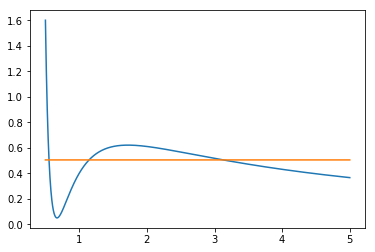

Pressure =  0.5044916497874875


In [43]:
def dichotomy(left = 0.1, right = 0.6, rtol = 1e-5):
    p_right = right
    p_left = left
    p_0 = (right + left) / 2
    a_0 = -1/p_0
    a_1 = 3/p_0
    a_2 = -(p_0 + 8 * tau)/(3 * p_0)
    root = roots(matrix(a_0, a_1, a_2))
   
    a = np.min(root)
    b = np.max(root)
    last = integral_diff(pii, a, b, p_0)
    new = 100000
    
    
    while ((np.abs ((new - last) / new)) > rtol):
        if (new > 0):
            p_left = p_0
            p_0 = (p_right + p_0) / 2
            
        else:
            p_right = p_0
            p_0 = (p_0 + p_left) / 2
            
        last = new
        a_0 = -1/p_0
        a_1 = 3/p_0
        a_2 = -(p_0 + 8 * tau)/(3 * p_0)
        root = roots(matrix(a_0, a_1, a_2))
        
        a = np.min(root)
        b = np.max(root)
       
        new = integral_diff(pii, a, b, p_0)
        
    return p_0
        
    
def pii(fi):
    """vdW pressure given volume& temperture. Reduced units."""
    return (8*tau*fi**2/3. - 3*fi + 1) / (fi**3 - (fi**2)/3. )


x = np.linspace(0.5, 5, 2000)
y = pii(x)
y1 = np.zeros(2000)
res = dichotomy(0.1, 0.65, 1e-5)
y1 += res


plt.plot(x,y)
plt.plot(x, y1)

plt.show()
print("Pressure = ", res)
    